In [1]:
import matplotlib.pyplot as plt

**!!! данные взяты из output-а min_element.cpp**

In [2]:
thread_count = [2, 4, 8, 16]
element_count = [100000, 1000000, 10000000, 100000000]

In [3]:
critical_data = {2:[0,0,0.014,0.129],4:[0.001,0.001,0.007,0.073],8:[0,0.001,0.006,0.06],16:[0,0.001,0.007,0.06]}

In [4]:
reduction_data = {2:[0.001,0.003,0.012,0.121],4:[0,0.001,0.007,0.061],8:[0.001,0.001,0.007,0.058],16:[0.002,0,0.006,0.049]}

In [5]:
consistent_data = {2:[0,0.003,0.025,0.258],4:[0,0.003,0.027,0.265],8:[0.001,0.002,0.026,0.261],16:[0,0.003,0.024,0.267]}

***Визуализация времени работы программы к размерности программы:***

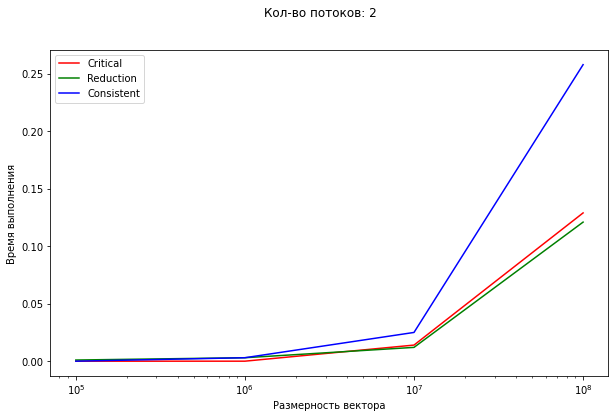

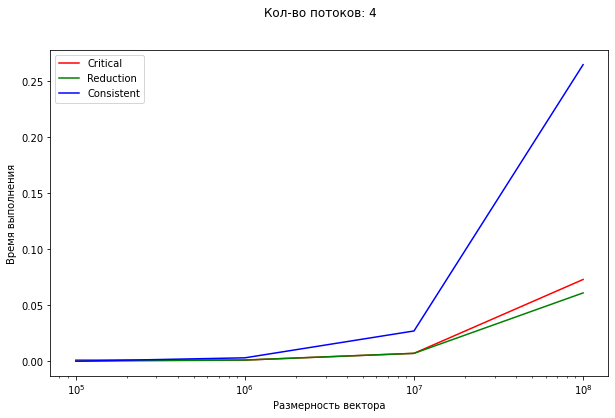

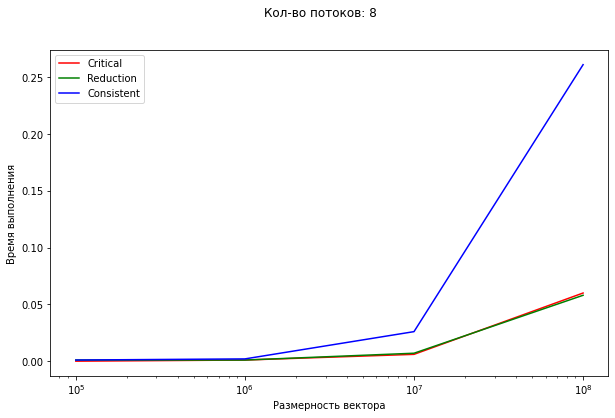

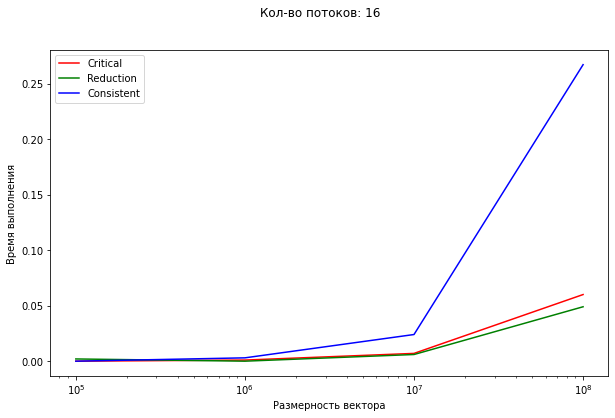

In [6]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
    ax1.set_xlabel('Размерность вектора')
    ax1.set_ylabel('Время выполнения')
    
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, critical_data[thread_count[i]], label = "Critical", color='r')
    ax1.plot(element_count, reduction_data[thread_count[i]], label = "Reduction", color='g')
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent", color='b')

    ax1.legend()
    plt.xscale('log')
    plt.yscale('linear')

Как и ожидалось, reduce работает гораздо лучше на больших объемах данных. Однако, различие во времени выполнения в сравнении с критической секцией не большое. При правильно подобранном кол-ве потоков (8) критическая секция работает так же, как и редукция

Однако при сравнительно небольших объемах (при размерности <= 10^5) - не важно, что использовать, как показывает статистика.

***Визуализация времени работы программы к кол-ву потоков:***

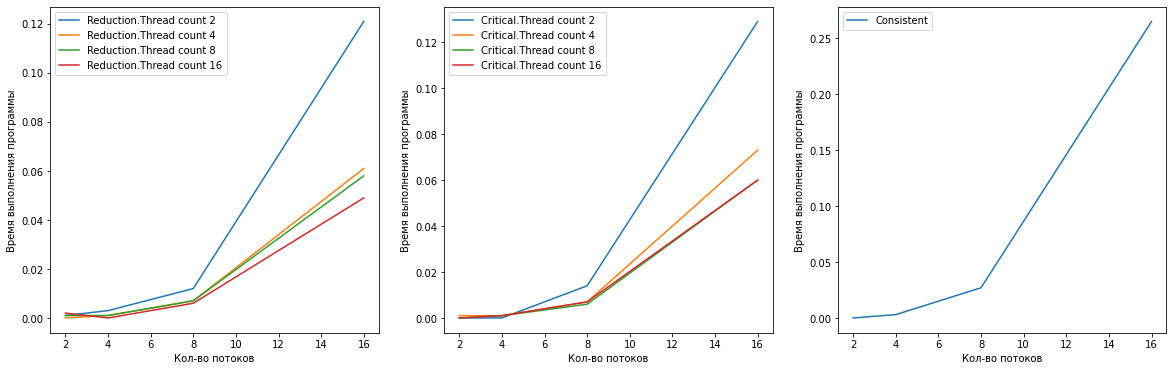

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 6))
ax1.set_xlabel('Кол-во потоков')
ax1.set_ylabel('Время выполнения программы')
ax2.set_xlabel('Кол-во потоков')
ax2.set_ylabel('Время выполнения программы')
ax3.set_xlabel('Кол-во потоков')
ax3.set_ylabel('Время выполнения программы')

ax3.plot(thread_count, consistent_data[thread_count[1]], label = 'Consistent')
for i in range(len(reduction_data)):
    ax1.plot(thread_count, reduction_data[thread_count[i]], label = 'Reduction.Thread count ' + str(thread_count[i]))
    ax2.plot(thread_count, critical_data[thread_count[i]], label = 'Critical.Thread count ' + str(thread_count[i]))

    
ax1.legend()
ax2.legend()
ax3.legend()

Здесь мы можем видеть, как кол-во потоков влияет на обработку данных. Reduce с увелечением кол-ва потоков стремительно уменьшает время выполнения программы. Особенно, в случае мигрорования с однопоточного приложения.

В случае критической зоны, поведение почти аналогичное за исключением что увелечение потоков в один момент перестает влиять на производительность.

**Визуализация ускорения работы программы:**

In [9]:
speed_up_critical = {k: [ b/ (b / (m + 0.0000000001) + 0.0000000001) for b,m in zip(consistent_data[k], critical_data[k])] for k in consistent_data if k in critical_data}
speed_up_reduce = {k: [ b/ (b / (m +0.0000000001) + 0.0000000001) for b, m in zip(consistent_data[k], reduction_data[k])] for k in consistent_data if k in reduction_data}

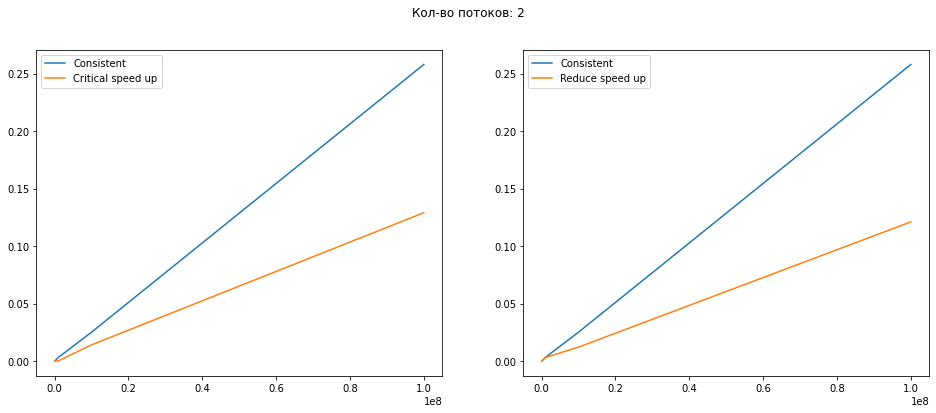

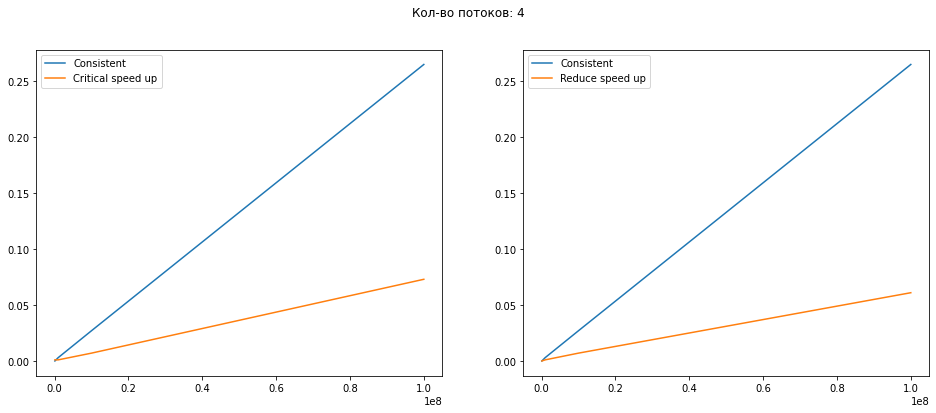

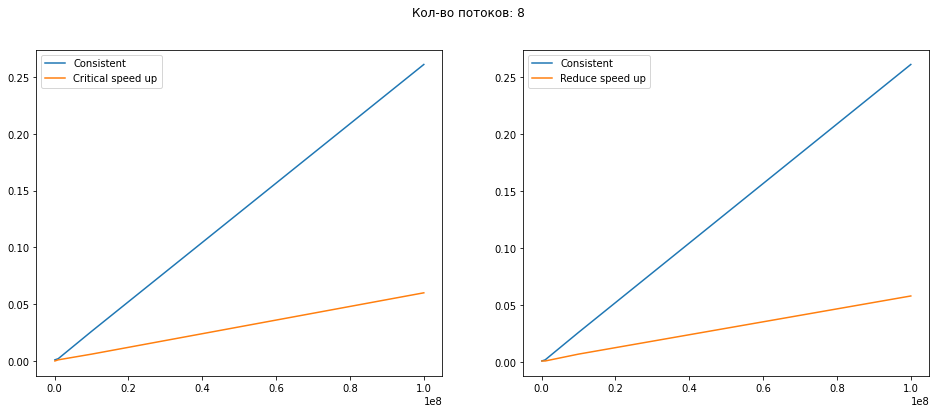

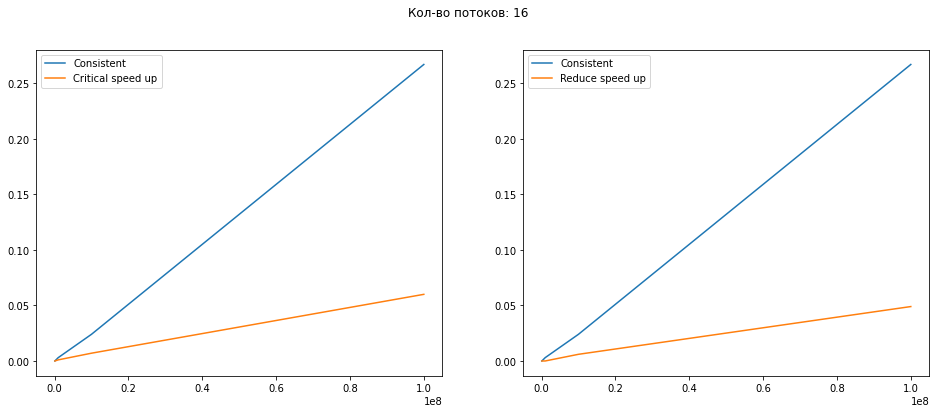

In [10]:
for i in range (len(element_count)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))

    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax1.plot(element_count, critical_data[thread_count[i]], label = "Critical speed up")
    
    ax2.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax2.plot(element_count, speed_up_reduce[thread_count[i]], label = "Reduce speed up")
    ax1.legend()
    ax2.legend()